**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [25]:
import numpy as np
from types import SimpleNamespace
import pandas as pd

In [26]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import Problem_1
import Problem_2
import Problem_3

from Problem_1 import ProductionEconomyCO2Taxation
economy = ProductionEconomyCO2Taxation()

from Problem_2 import CareerChoiceClass
model = CareerChoiceClass()

from Problem_3 import PointAnalysis
intermodel = PointAnalysis()

#AI has been used in Problem_1.py, Problem_2.py and Problem_3.py to generate and help fixing code. AI has not been used to generate text.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [27]:
# Check market clearing conditions
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
market_clearing_results = []

for p1 in p1_values:
    for p2 in p2_values:
        labor_market_error, good_market_1_error, good_market_2_error = economy.check_market_clearing(p1, p2)
        market_clearing_results.append({
            'p1': p1,
            'p2': p2,
            'labor_market': labor_market_error,
            'good_market_1': good_market_1_error,
            'good_market_2': good_market_2_error
        })

# Display the results
df = pd.DataFrame(market_clearing_results)
print(df)

     p1        p2  labor_market  good_market_1  good_market_2
0   0.1  0.100000      0.993336       2.960008       6.973353
1   0.1  0.311111      0.964481       3.003628       2.134665
2   0.1  0.522222      0.906287       3.092935       1.143179
3   0.1  0.733333      0.819299       3.229562       0.676830
4   0.1  0.944444      0.704233       3.415661       0.384000
..  ...       ...           ...            ...            ...
95  2.0  1.155556     -0.632792      -0.694771       0.654879
96  2.0  1.366667     -0.784791      -0.677635       0.417424
97  2.0  1.577778     -0.961060      -0.657455       0.224272
98  2.0  1.788889     -1.160465      -0.634060       0.060180
99  2.0  2.000000     -1.381976      -0.607296      -0.083692

[100 rows x 5 columns]


Above we have checked the market clearing conditions for $p_1$ in linspace(0.1,2.0,10) and $p_2$ in linspace(0.1,2.0,10), using $w=1$ as numeraire.
The output shows how varying prices of $p_1$ and $p_2$ affect the equilibrium conditions in the labour market and the markets for the two goods. For a lot of price combinations there is a lot of market error. 

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [28]:
# Find the equilibrium prices by clearing the labour market and the market for good 1
p1_eq, p2_eq = economy.find_equilibrium()

# Display the equilibrium prices
print(f'Equilibrium prices: p1 = {p1_eq:.4f}, p2 = {p2_eq:.4f}')

# We check if all markets clear at this price
labor_market, good_market_1, good_market_2 = economy.check_market_clearing(p1_eq, p2_eq)
print(f'\nMarket clearing errors: labor market error = {labor_market:.2f}, good 1 market error = {good_market_1:.2f}, good 2 market error = {good_market_2:.2f}')

# AI has been used for this question

Equilibrium prices: p1 = 0.9757, p2 = 1.4904

Market clearing errors: labor market error = -0.00, good 1 market error = -0.00, good 2 market error = -0.00


At the found equilibrium prices all of the markets clear such that the errors are equal to zero. 

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

Optimal tax tau: 0.2361
Optimal lump-sum transfer T: 0.1688


/Users/claraengelund/Desktop/Programmer/projects-2024-clara-og-theis/examproject/Problem_1.py:49: RuntimeWarning: invalid value encountered in power
  return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * ell ** (1 + par.epsilon) / (1 + par.epsilon)


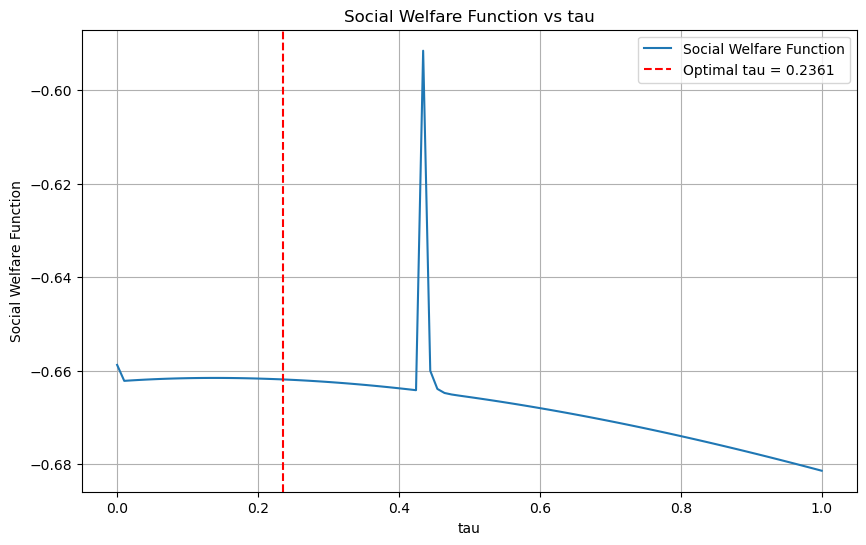

In [29]:
#Find the optimal tax tau and lump-sum transfer T 
optimal_tau, optimal_T = economy.find_optimal_tax()

# Display the optimal tau and T
print(f'Optimal tax tau: {optimal_tau:.4f}')
print(f'Optimal lump-sum transfer T: {optimal_T:.4f}')

# Plot SWF
economy.plot_swf()

Looking at the graph showing the social welfare as a function of tau, it looks like there may be a fault in the code. We expect a more smooth function and that our found optimal tax would intersect the graph at the maximum point. 

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [30]:
# Simulate and calculate the expected utility for each career choice
model.simulation()

# AI has been used to generate the output of this question


Expected utility for each career track:
Career track 1: 1.02
Career track 2: 2.01
Career track 3: 3.00

Average realized utility for each career track:
Career track 1: 1.02
Career track 2: 2.01
Career track 3: 3.00


We see that the expected utility for each career track is the same as the average realized utility. This makes sense because the number of draws, K, is large. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

To visualize the share of graduates choosing each career for each graduate that chooses each careeer, we do a stacked bar chart. We furthermore show the average subjective expected utility of the graduates, and the average ex post realized utility given their choice in two seperate bar charts to compare the results across graduates. 

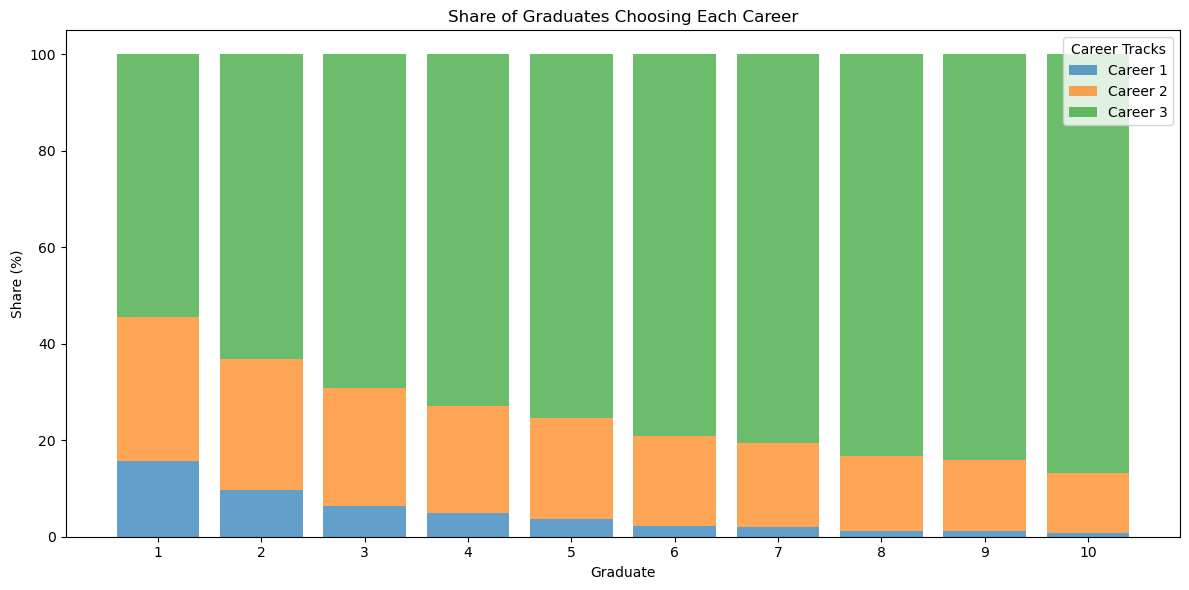

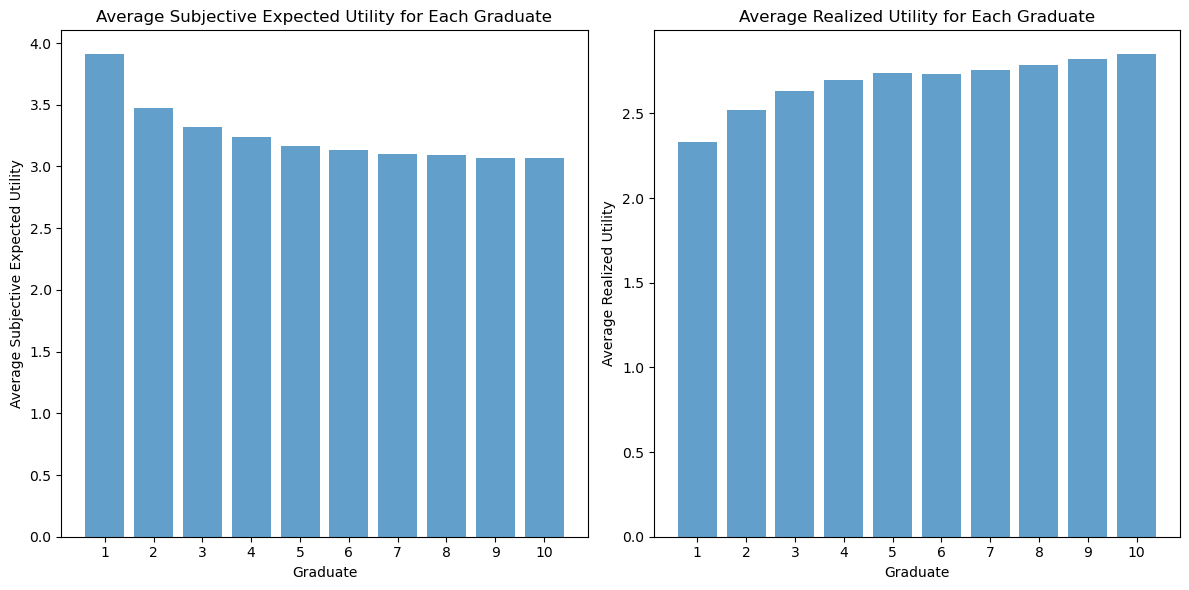

In [31]:
# Calculate for each graduate the formulas given above and visualize these
model.newscenario()

# AI has been used for this question

Considering the stacked bar chart we see that, in general, the graduates choose career track 3 the most. This makes sense as this has the largest $v_j$ value. Graduate 1 has the lowest share of choices of career track 3 but the highest share of career 1 choices compared to the other graduates. Through graduate 1 to 10 the share of career 3 choices is increasing. Considering the utility for each graduate, graduate 10 which, as mentioned, has the highest share of career 3 choices also has the highest average realized utility. However, it has the lowest average subjective expected utility. In general, the subjective expected utility of the graduates is at a higher level than the realized utility, showing that they are overestimating the utility of their career choices. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

We plot the expected utility and realized utility and compare the scenario without switching to the scanario where switching is switching. Furthermore, we plot the share of graduates, for each graduate $i$, that switching and show where they switch from.

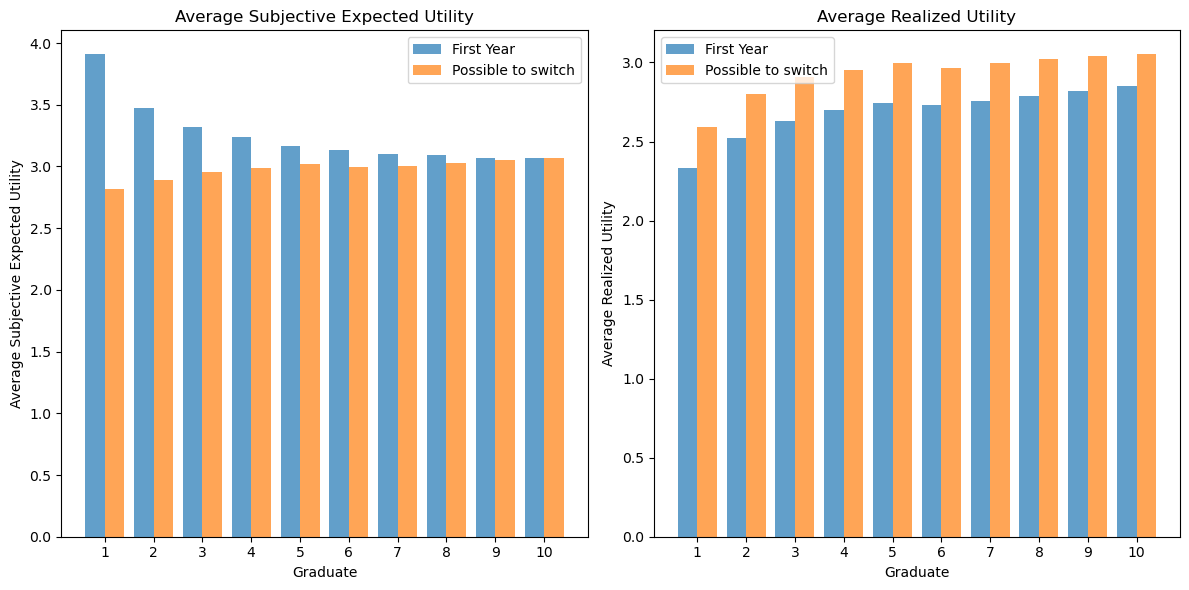

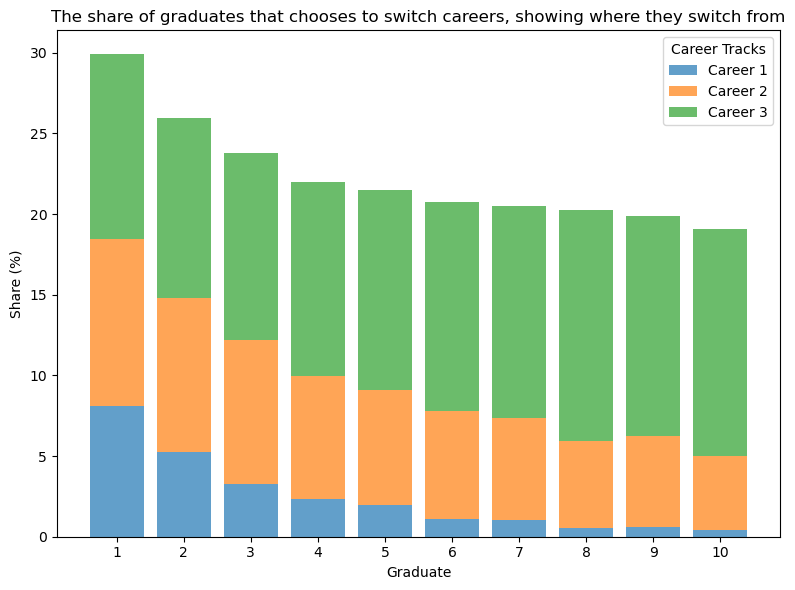

In [32]:
# In the scenario where switching is possible after a year of working we visualize our new results 
model.scenario_with_switching()

# AI has been used for this question

Looking at the subjective expected utility we find that the expected utility is generally lower in the scenario where switching is possible. However, the difference is largest for the first four graduates, whereas there is no difference for graduate 10. The realized utility is higher in the scenario where it is possible to switch career track for all of the graduates. 
The stacked bar chart shows that almost 30 pct. of graduate 1 switches career track. Most of this switch is from career 2 and career 3. In general, the graduates mainly shift from career 3 which is also the career that they mostly chose in the first year. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

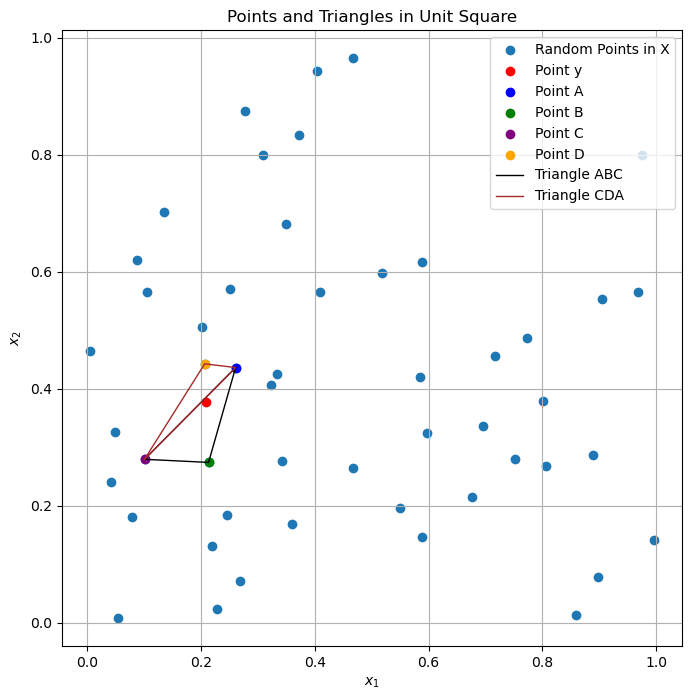

In [33]:
# Find the points and plot these
intermodel.plot_question_1()

# AI has been used for this question

The following points, A, B, C and D have been found and are illustrated above together with X and y. Furthermore, triangle ABC has been drawn with black and triangle CDA is brown.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [34]:
# Compute the barycentric coordinates
intermodel.question_2()

# AI has been used for this question

r_ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
r_CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
y is inside triangle ABC: True
y is inside triangle CDA: False


The berycentric coordinates of the point y with respect to the triangle ABC are approximately (0.63, 0.07, 0.30) and (0.37, -0.13, 0.77) for triangle CDA. From the coordinates we can see that the point is inside triangle ABC, since all the barycentric coordinates are between 0 and 1. This is consistent with the figure above.

Now we consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [35]:
# Compute the approximation of f(y) using the full algoritm
intermodel.question_3()

# AI has been used for this question

Approximated f(y): 0.08405201731052576
True f(y): 0.0789565216259594
Absolute error: 0.005095495684566367


When comparing the value of the approximation of f(y) and the full algorithm we get a difference of 0.005, which is extremely close. This could indicate that the algorithm provides a good approximation for f(y).

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [36]:
# Compute the approximation of f(y) for all points in the set Y
intermodel.question_4()

# AI has been used for this question

Point Y[0]: (0.2, 0.2)
  Approximated f(y): 0.04032631372248057
  True f(y): 0.04000000000000001
  Absolute error: 0.0003263137224805632
Point Y[1]: (0.8, 0.2)
  Approximated f(y): 0.15874233999349835
  True f(y): 0.16000000000000003
  Absolute error: 0.0012576600065016819
Point Y[2]: (0.8, 0.8)
  Approximated f(y): nan
  True f(y): 0.6400000000000001
  Absolute error: nan
Point Y[3]: (0.8, 0.2)
  Approximated f(y): 0.15874233999349835
  True f(y): 0.16000000000000003
  Absolute error: 0.0012576600065016819
Point Y[4]: (0.5, 0.5)
  Approximated f(y): 0.2512901561119622
  True f(y): 0.25
  Absolute error: 0.001290156111962204


Point Y[0]: (0.2, 0.2)
The approximation is very close to the true value, with a very small absolute error.

Point Y[1]: (0.8, 0.2): The approximation is also very close to the true value, with a bit larger absolute error.

Point Y[2]: (0.8, 0.8): The approximation returned nan, indicating that the point was not inside any of the considered triangles. Hence, the approximation could not be computed.

Point Y[3]: (0.8, 0.2): This is a repeated point from Y[1], and the results are consistent with the previous computation.

Point Y[4]: (0.5, 0.5): The approximation is very close to the true value, with a small absolute error.

These results indicate that the algorithm generally provides good approximations for f(y) for the given set Y, except in cases where the point lies outside the considered triangles.